In [1]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [2]:
import pickle

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pickle

In [5]:
class StockPricePredictor:
    def __init__(self):
        self.dataframe = pd.DataFrame([])
        self.model = None

    def read(self, file_name: str):
        """Reads a CSV file into the dataframe."""
        if os.path.exists(file_name):
            self.dataframe = pd.read_csv(file_name)
            print(f"Data successfully read from {file_name}.")
        else:
            print(f"Error: The file {file_name} does not exist.")

    def preprocess_data(self, target_column='Close'):
        """Preprocesses the data for LSTM."""
        # Drop rows with missing values
        self.dataframe.dropna(inplace=True)

        # Normalize data
        scaler = MinMaxScaler()
        self.dataframe[target_column] = scaler.fit_transform(self.dataframe[[target_column]])

    def create_sequences(self, sequence_length=10, target_column='Close'):
        """Creates sequences for LSTM training."""
        sequences = []
        targets = []

        for i in range(len(self.dataframe) - sequence_length):
            sequence = self.dataframe.iloc[i : i + sequence_length][target_column]
            target = self.dataframe.iloc[i + sequence_length][target_column]
            sequences.append(sequence.values)
            targets.append(target)

        return np.array(sequences), np.array(targets)

    def build_model(self, sequence_length, feature_dim=1):
        """Builds the LSTM model."""
        self.model = Sequential([
            LSTM(50, activation='relu', input_shape=(sequence_length, feature_dim)),
            Dense(1)
        ])
        self.model.compile(optimizer='adam', loss='mse')

    def train_model(self, X_train, y_train, epochs=50, batch_size=32):
        """Trains the LSTM model."""
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)
        return history

    def evaluate_model(self, X_test, y_test):
        """Evaluates the model on test data."""
        y_pred = self.model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        mae = self.calculate_mae(y_test, y_pred)
        r2 = self.calculate_r2_score(y_test, y_pred)
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"R² Score: {r2}")
        return mse, rmse, mae, r2

    def calculate_mae(self, y_true, y_pred):
        """Calculates the Mean Absolute Error (MAE)."""
        return mean_absolute_error(y_true, y_pred)

    def calculate_r2_score(self, y_true, y_pred):
        """Calculates the R² score."""
        return r2_score(y_true, y_pred)

    def save_model(self, file_name: str):
        """Saves the trained model to a file."""
        with open(file_name, 'wb') as file:
            pickle.dump(self.model, file)
        print(f"Model saved to {file_name}.")

    def load_model(self, file_name: str):
        """Loads the model from a file."""
        if os.path.exists(file_name):
            with open(file_name, 'rb') as file:
                self.model = pickle.load(file)
            print(f"Model loaded from {file_name}.")
        else:
            print(f"Error: The file {file_name} does not exist.")

    def visualize(self, y_label):
        """Plots graph for stock values vs. date."""
        if 'Date' in self.dataframe.columns and y_label in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=self.dataframe, x='Date', y=y_label)
            plt.title(f'{y_label} Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel(f'{y_label} Stock Value')
            plt.show()
        else:
            print(f"Dataframe does not contain 'Date' and '{y_label}' columns.")

Data successfully read from 5PAISA.csv.


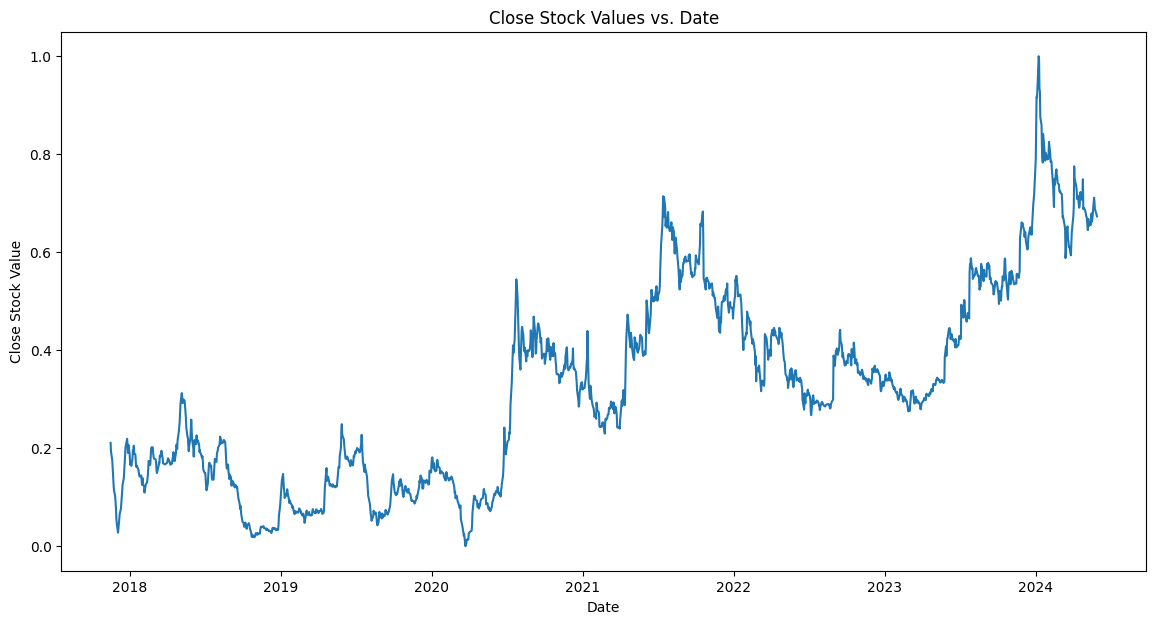

Epoch 1/50
40/40 - 2s - loss: 0.0255 - 2s/epoch - 42ms/step
Epoch 2/50
40/40 - 0s - loss: 0.0015 - 187ms/epoch - 5ms/step
Epoch 3/50
40/40 - 0s - loss: 8.9945e-04 - 199ms/epoch - 5ms/step
Epoch 4/50
40/40 - 0s - loss: 8.4081e-04 - 198ms/epoch - 5ms/step
Epoch 5/50
40/40 - 0s - loss: 8.2124e-04 - 199ms/epoch - 5ms/step
Epoch 6/50
40/40 - 0s - loss: 7.9670e-04 - 189ms/epoch - 5ms/step
Epoch 7/50
40/40 - 0s - loss: 7.6292e-04 - 187ms/epoch - 5ms/step
Epoch 8/50
40/40 - 0s - loss: 7.5467e-04 - 216ms/epoch - 5ms/step
Epoch 9/50
40/40 - 0s - loss: 7.6325e-04 - 196ms/epoch - 5ms/step
Epoch 10/50
40/40 - 0s - loss: 7.0236e-04 - 210ms/epoch - 5ms/step
Epoch 11/50
40/40 - 0s - loss: 6.8854e-04 - 191ms/epoch - 5ms/step
Epoch 12/50
40/40 - 0s - loss: 6.5929e-04 - 198ms/epoch - 5ms/step
Epoch 13/50
40/40 - 0s - loss: 6.5964e-04 - 232ms/epoch - 6ms/step
Epoch 14/50
40/40 - 0s - loss: 6.2592e-04 - 276ms/epoch - 7ms/step
Epoch 15/50
40/40 - 0s - loss: 6.0795e-04 - 268ms/epoch - 7ms/step
Epoch 16/50
40

In [7]:
if __name__ == "__main__":
    predictor = StockPricePredictor()
    predictor.read("5PAISA.csv")  # Replace "your_dataset.csv" with your dataset file
    predictor.preprocess_data()
    predictor.visualize('Close')
    sequence_length = 10  # Define sequence length
    sequences, targets = predictor.create_sequences(sequence_length=sequence_length)
    X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)
    X_train = X_train.reshape((len(X_train), sequence_length, 1))
    X_test = X_test.reshape((len(X_test), sequence_length, 1))
    predictor.build_model(sequence_length)
    history = predictor.train_model(X_train, y_train)

In [10]:
# Save the trained model
predictor.save_model('lstm_stock_model.pkl')

Model saved to lstm_stock_model.pkl.


In [11]:
# Load the model
predictor.load_model('lstm_stock_model.pkl')

Model loaded from lstm_stock_model.pkl.


In [12]:
# Perform predictions on the test data
y_pred = predictor.model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


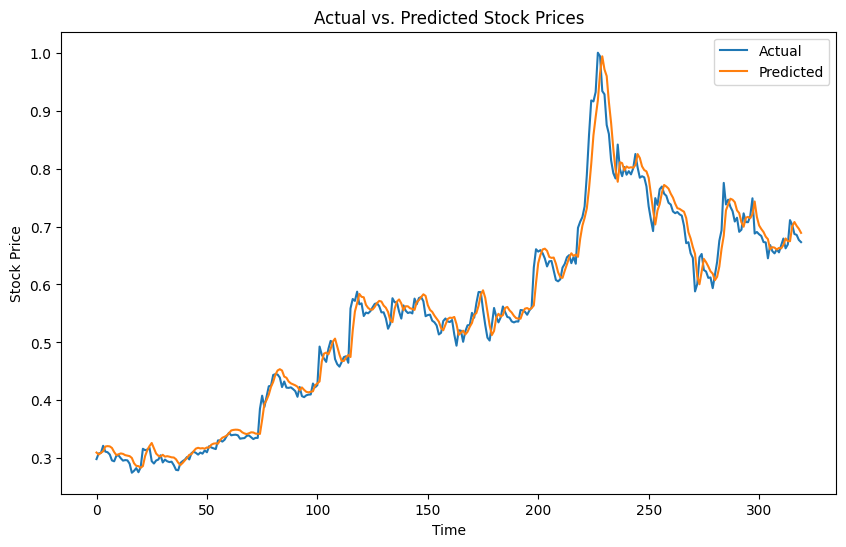

In [13]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [9]:
# Evaluate the model
mse, rmse, mae, r2 = predictor.evaluate_model(X_test, y_test)

10/10 [==============================] - 0s 8ms/step
Mean Squared Error (MSE): 0.0005951858753943639
Root Mean Squared Error (RMSE): 0.02439643161190513
Mean Absolute Error (MAE): 0.01729569324808472
R² Score: 0.9791126404333508


In [14]:
# Validate the loaded model using test data
y_pred_loaded = predictor.model.predict(X_test)
mse_loaded, rmse_loaded, mae_loaded, r2_loaded = predictor.evaluate_model(X_test, y_test)

10/10 [==============================] - 0s 7ms/step
Mean Squared Error (MSE): 0.0005951858753943639
Root Mean Squared Error (RMSE): 0.02439643161190513
Mean Absolute Error (MAE): 0.01729569324808472
R² Score: 0.9791126404333508


In [15]:
# Print the evaluation metrics for the loaded model
print("\nEvaluation metrics for the loaded model:")
print(f"Mean Squared Error (MSE): {mse_loaded}")
print(f"Root Mean Squared Error (RMSE): {rmse_loaded}")
print(f"Mean Absolute Error (MAE): {mae_loaded}")
print(f"R² Score: {r2_loaded}")


Evaluation metrics for the loaded model:
Mean Squared Error (MSE): 0.0005951858753943639
Root Mean Squared Error (RMSE): 0.02439643161190513
Mean Absolute Error (MAE): 0.01729569324808472
R² Score: 0.9791126404333508


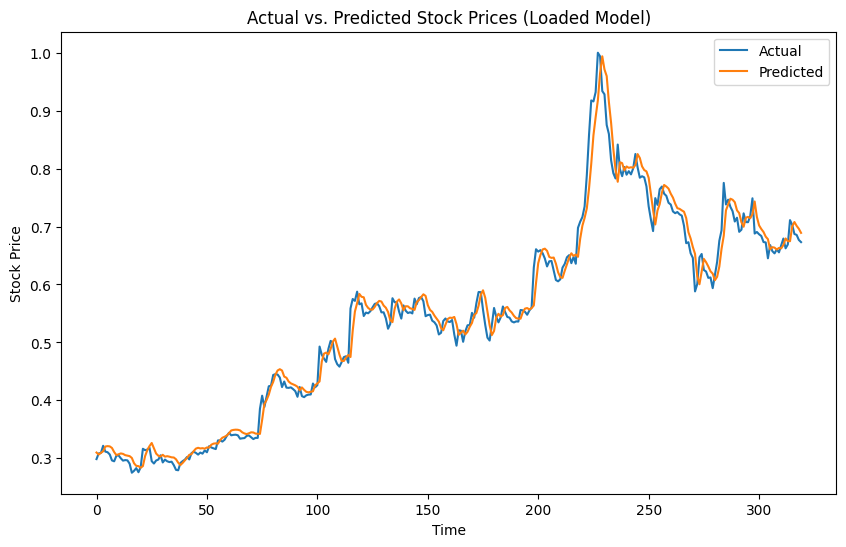

In [16]:
# Plot actual vs. predicted values for the loaded model
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_loaded, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices (Loaded Model)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()